In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# #Load DataSet
# brfss = pd.read_csv(f'C:\Github\Diabetes\Diabetes\Data\diabetes_012_health_indicators_BRFSS2015.csv')
# brfss.info
# Load the datasets
df_012 = pd.read_csv('C:\Github\Diabetes\Diabetes\Data\diabetes_012_health_indicators_BRFSS2015.csv')
df_binary = pd.read_csv('C:\Github\Diabetes\Diabetes\Data\diabetes_binary_health_indicators_BRFSS2015.csv')
df_5050 = pd.read_csv('C:\Github\Diabetes\Diabetes\Data\diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

# Display the first few rows of each dataset
df_012.head(), df_binary.head(), df_5050.head()

(   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
 0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
 1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
 2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
 3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
 4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   
 
    HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
 0                   0.0           0.0     0.0  ...            1.0   
 1                   0.0           1.0     0.0  ...            0.0   
 2                   0.0           0.0     1.0  ...            1.0   
 3                   0.0           1.0     1.0  ...            1.0   
 4                   0.0           1.0     1.0  ...            1.0   
 
    NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
 0          0.0      5.0      18.0      15.0       1.0  0.0   9.0     

In [3]:
# Display basic information and summary statistics
df_012.info(), df_012.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

(None,
         Diabetes_012         HighBP       HighChol      CholCheck  \
 count  253680.000000  253680.000000  253680.000000  253680.000000   
 mean        0.296921       0.429001       0.424121       0.962670   
 std         0.698160       0.494934       0.494210       0.189571   
 min         0.000000       0.000000       0.000000       0.000000   
 25%         0.000000       0.000000       0.000000       1.000000   
 50%         0.000000       0.000000       0.000000       1.000000   
 75%         0.000000       1.000000       1.000000       1.000000   
 max         2.000000       1.000000       1.000000       1.000000   
 
                  BMI         Smoker         Stroke  HeartDiseaseorAttack  \
 count  253680.000000  253680.000000  253680.000000         253680.000000   
 mean       28.382364       0.443169       0.040571              0.094186   
 std         6.608694       0.496761       0.197294              0.292087   
 min        12.000000       0.000000       0.000000  

In [4]:
df_binary.info(), df_binary.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

(None,
        Diabetes_binary         HighBP       HighChol      CholCheck  \
 count    253680.000000  253680.000000  253680.000000  253680.000000   
 mean          0.139333       0.429001       0.424121       0.962670   
 std           0.346294       0.494934       0.494210       0.189571   
 min           0.000000       0.000000       0.000000       0.000000   
 25%           0.000000       0.000000       0.000000       1.000000   
 50%           0.000000       0.000000       0.000000       1.000000   
 75%           0.000000       1.000000       1.000000       1.000000   
 max           1.000000       1.000000       1.000000       1.000000   
 
                  BMI         Smoker         Stroke  HeartDiseaseorAttack  \
 count  253680.000000  253680.000000  253680.000000         253680.000000   
 mean       28.382364       0.443169       0.040571              0.094186   
 std         6.608694       0.496761       0.197294              0.292087   
 min        12.000000       0.00000

In [6]:
df_5050.info(), df_5050.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

(None,
        Diabetes_binary        HighBP      HighChol     CholCheck  \
 count     70692.000000  70692.000000  70692.000000  70692.000000   
 mean          0.500000      0.562468      0.527754      0.975443   
 std           0.500004      0.496086      0.499233      0.154772   
 min           0.000000      0.000000      0.000000      0.000000   
 25%           0.000000      0.000000      0.000000      1.000000   
 50%           0.500000      1.000000      1.000000      1.000000   
 75%           1.000000      1.000000      1.000000      1.000000   
 max           1.000000      1.000000      1.000000      1.000000   
 
                 BMI        Smoker        Stroke  HeartDiseaseorAttack  \
 count  70692.000000  70692.000000  70692.000000          70692.000000   
 mean      29.869009      0.472203      0.062440              0.147683   
 std        7.203087      0.499230      0.241954              0.354788   
 min       12.000000      0.000000      0.000000              0.000000   


In [7]:
data = df_binary
data['Diabetes'] = data['Diabetes_binary']
# data = df_012
# data = df_5050

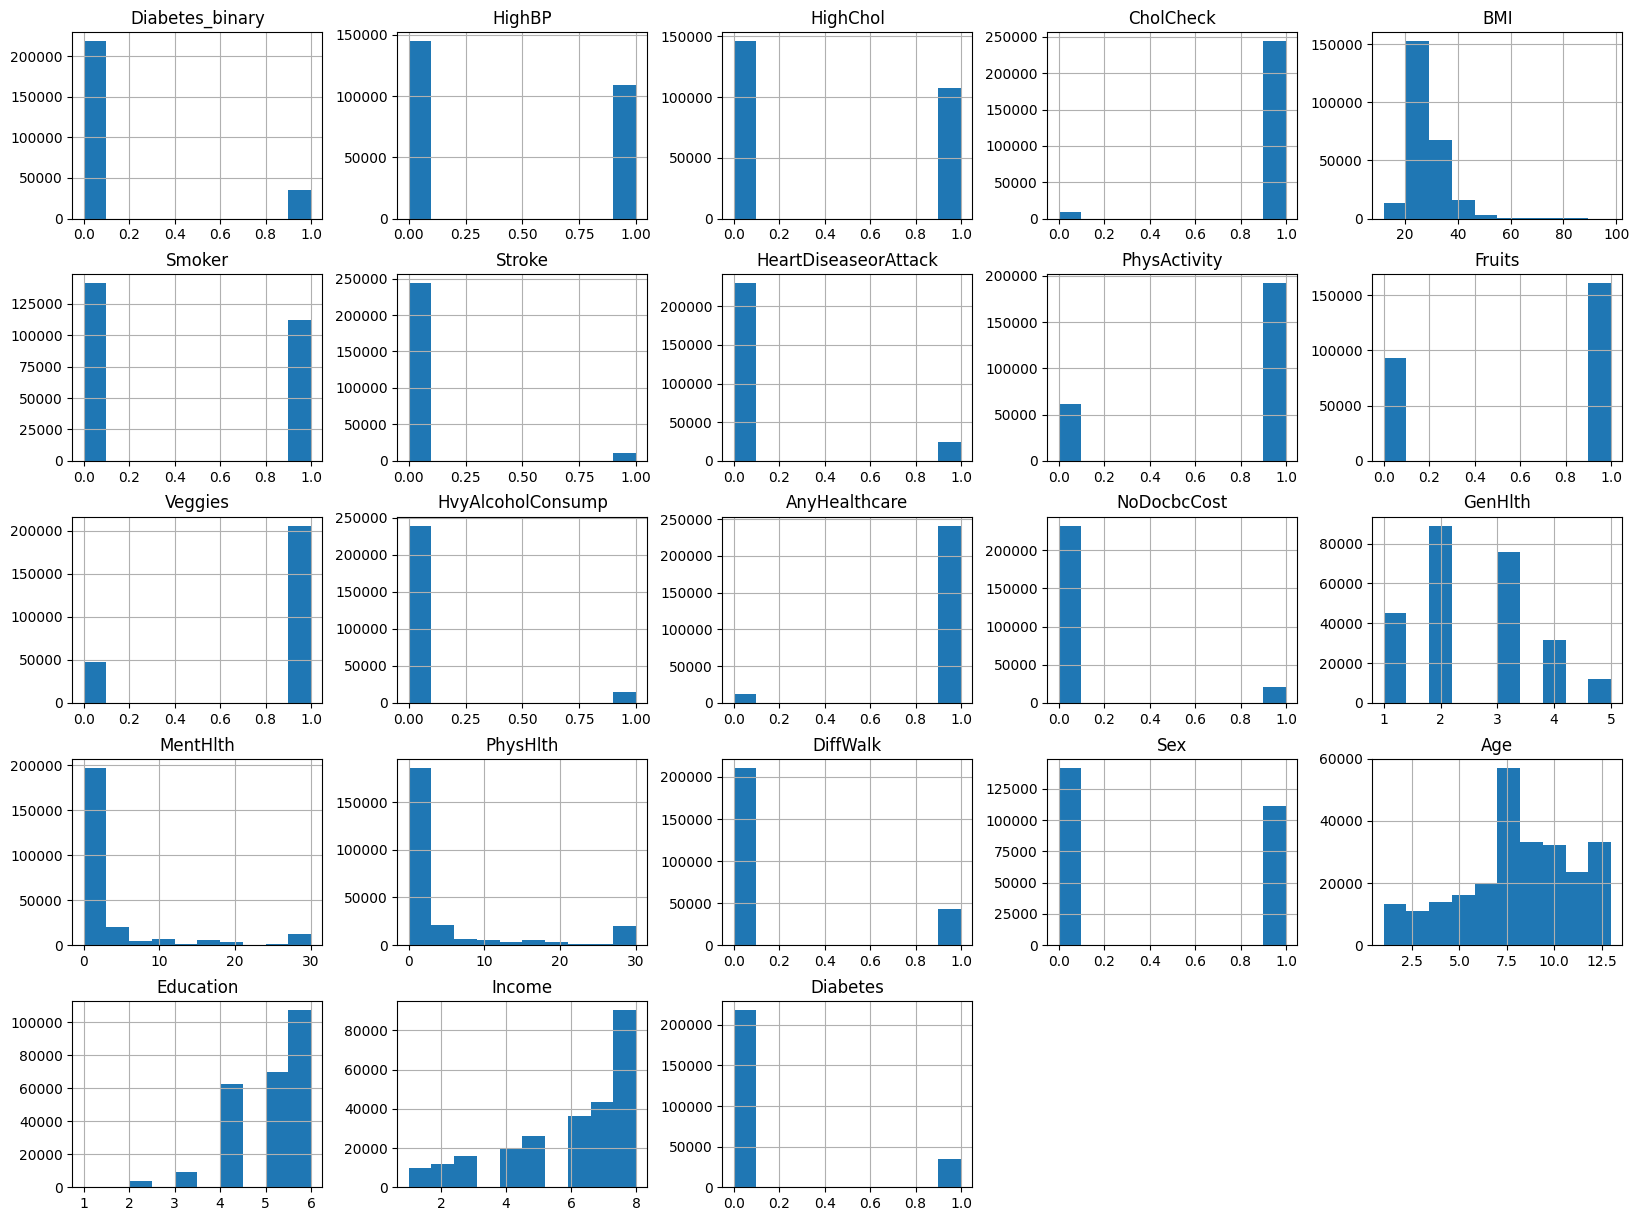

In [9]:
data.hist(figsize=(20,15))
plt.show()

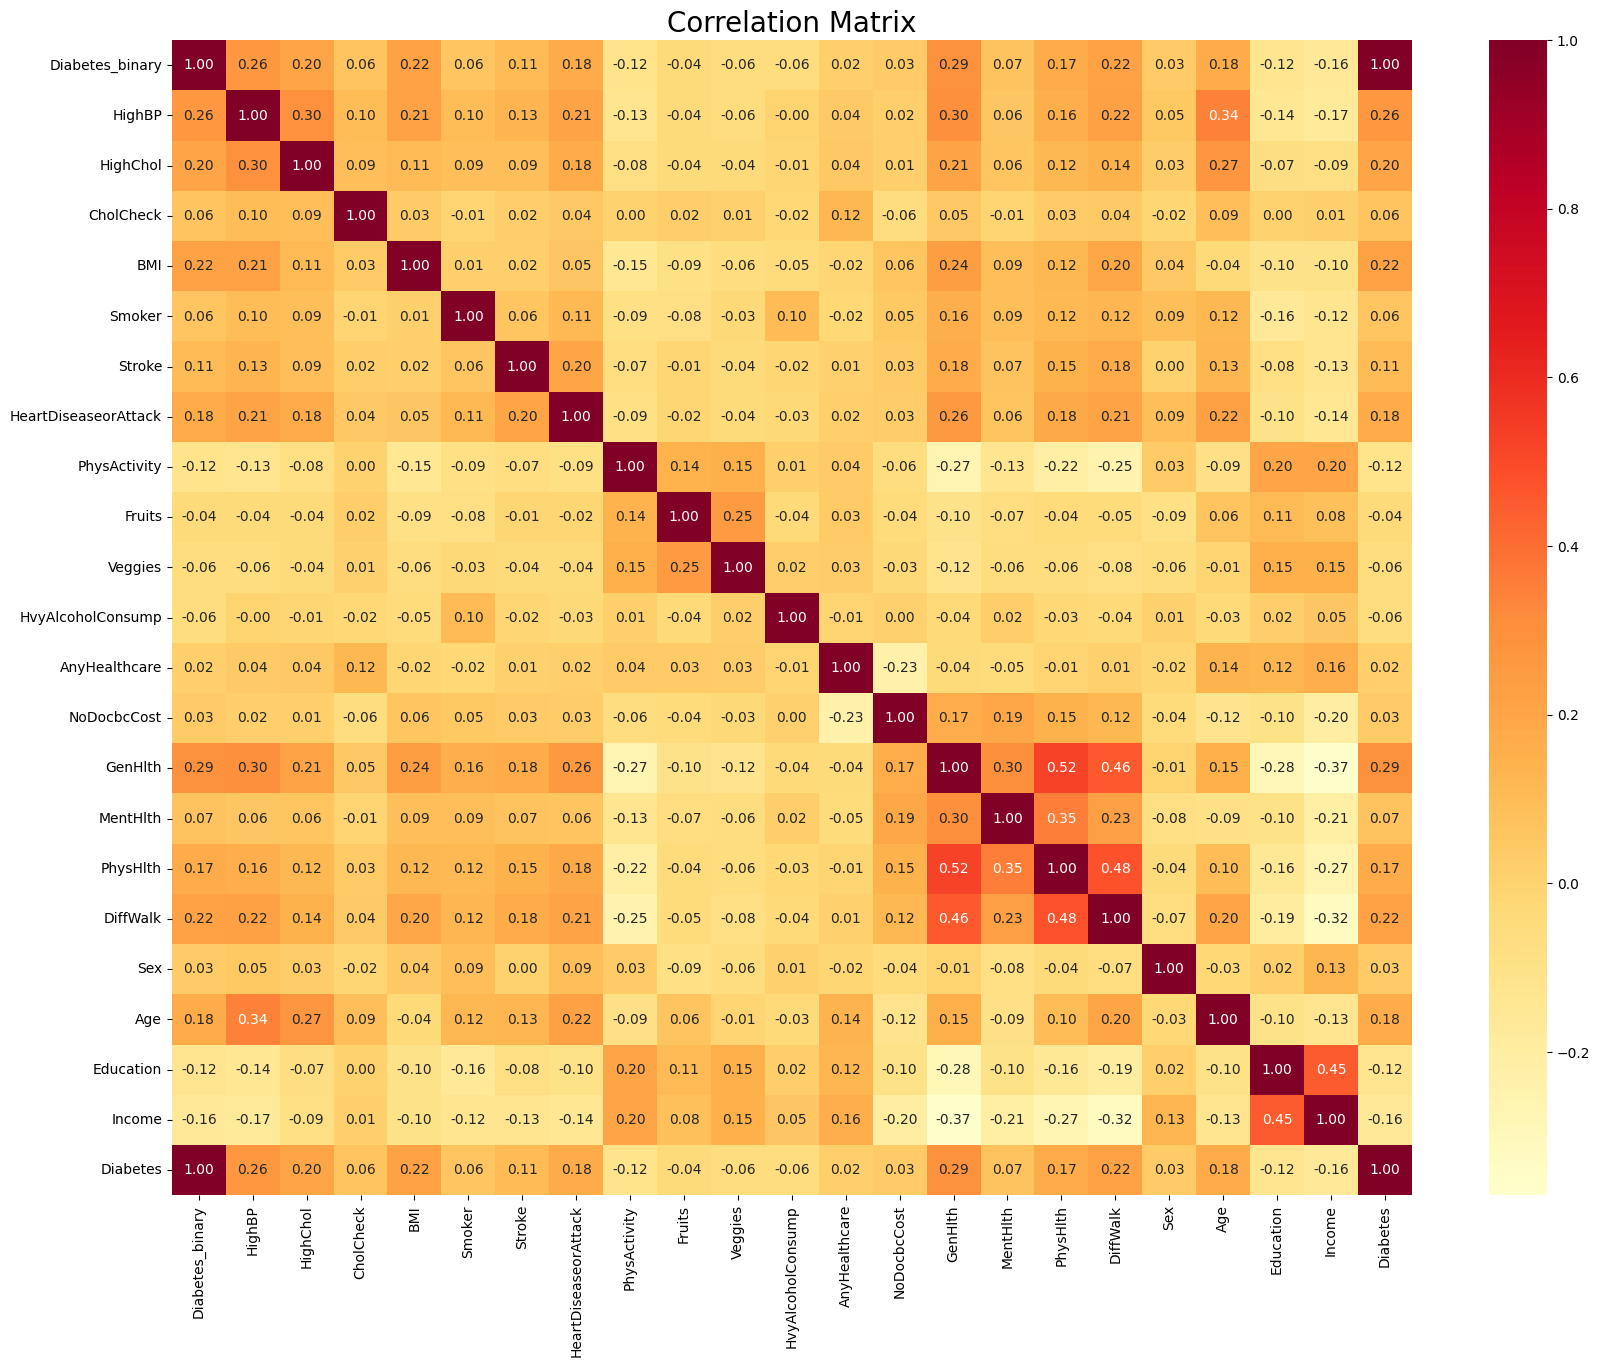

In [11]:
f,ax = plt.subplots(figsize=[20,15])
sns.heatmap(data.corr(), annot=True, fmt = '.2f', ax=ax, cmap='YlOrRd')
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

Spliting

In [29]:
data1=data.drop(columns=['CholCheck','Fruits', 'Veggies','NoDocbcCost','MentHlth','CholCheck','Smoker',"Diabetes_binary"])
data1.head()

,HighBP,HighChol,BMI,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,AnyHealthcare,GenHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes
0,1.0,1.0,40.0,0.0,0.0,0.0,0.0,1.0,5.0,15.0,1.0,0.0,9.0,4.0,3.0,0.0
1,0.0,0.0,25.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,7.0,6.0,1.0,0.0
2,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,5.0,30.0,1.0,0.0,9.0,4.0,8.0,0.0
3,1.0,0.0,27.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,11.0,3.0,6.0,0.0
4,1.0,1.0,24.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,11.0,5.0,4.0,0.0


In [30]:
from sklearn.model_selection import train_test_split
x= data1.drop('Diabetes', axis=1)
y = data1['Diabetes']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [32]:
from sklearn.metrics import confusion_matrix, classification_report
rf_pred = rf.predict(x_test)
cm = confusion_matrix(y_test, rf_pred)
print(cm)
print(classification_report(y_test, rf_pred))

[[41854  1885]
 [ 5597  1400]]
              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92     43739
         1.0       0.43      0.20      0.27      6997

    accuracy                           0.85     50736
   macro avg       0.65      0.58      0.60     50736
weighted avg       0.82      0.85      0.83     50736



Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [34]:
y_pred = lr.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[42743   996]
 [ 5833  1164]]
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     43739
         1.0       0.54      0.17      0.25      6997

    accuracy                           0.87     50736
   macro avg       0.71      0.57      0.59     50736
weighted avg       0.83      0.87      0.83     50736



xgboosting - pending

In [ ]:
# from xgboost import XGBClassifier
# xgb = XGBClassifier()
# xgb.fit(x_train, y_train)

knn

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [19]:
knn_pred = knn.predict(x_test)
cm = confusion_matrix(y_test, knn_pred)
print(cm)
print(classification_report(y_test, knn_pred))

[[43446   293]
 [ 2356  4641]]
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97     43739
         1.0       0.94      0.66      0.78      6997

    accuracy                           0.95     50736
   macro avg       0.94      0.83      0.87     50736
weighted avg       0.95      0.95      0.94     50736



In [20]:
%pip install gradio

Note: you may need to restart the kernel to use updated packages.


In [54]:
import numpy as np
import gradio as gr
import joblib

# Load the trained Random Forest model


def predict_diabetes(HighBP, HighChol, BMI, Stroke, HeartDiseaseorAttack, PhysActivity,
                     HvyAlcoholConsump, AnyHealthcare, GenHlth, PhysHlth, DiffWalk,
                     Sex, Age, Education, Income):
    # Create a list of features
    features = [HighBP, HighChol, BMI, Stroke, HeartDiseaseorAttack, PhysActivity,
                HvyAlcoholConsump, AnyHealthcare, GenHlth, PhysHlth, DiffWalk,
                Sex, Age, Education, Income]

    # Convert features to a NumPy array and reshape for prediction
    features_array = np.array(features).reshape(1, -1)

    # Use the trained Random Forest model to make a prediction
    # prediction = rf.predict(features_array)[0]
    # prediction = rf.predict(features_array)
    prediction = lr.predict(features_array)

    # Return the prediction result as a string
    return 'Diabetic' if prediction == 1 else 'Non-Diabetic'

# Create Gradio interface

inputs = [
    gr.components.Radio([0, 1], label="Do you have high blood pressure? (0=No, 1=Yes)",value=0),
    gr.components.Radio([0, 1], label="Do you have high blood cholesterol? (0=No, 1=Yes)", value=0),
    gr.components.Number(label="What is you Body Mass Index (BMI)?",value=20),
    gr.components.Radio([0, 1], label="Do you have any stroke before? (0=No, 1=Yes) ",value=0),
    gr.components.Radio([0, 1], label="Do you have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)? (0=No, 1=Yes)",value=0),
    gr.components.Radio([0, 1], label="Do you do physical activity or exercise during the past 30 days other than your regular job? (0=No, 1=Yes)",value=1),
    gr.components.Radio([0, 1], label="Are you a heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) (0=No, 1=Yes)",value=0),
    gr.components.Radio([0, 1], label="Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service? (0=No, 1=Yes)",value=1),
    gr.components.Slider(1, 5, step=1, label="Would you say that in general your health.(1=Excellent;2=Very good;3=Good;4=Fair;5=Poor)",value=3),
    gr.components.Slider(0, 30, step=1, label="Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good?",value=20),
    gr.components.Radio([0, 1], label="Do you have serious difficulty walking or climbing stairs?(0=No, 1=Yes) ", value=0),
    gr.components.Radio([0, 1], label="Sex (0 for Female, 1 for Male)", value=1),
    gr.components.Slider(1, 13, step=1, label="Please indicate your age category. (1=18-24;2=25-29;3=30-34;4=35-39;5=40-44;6=45-49;7=50-54;8=55-59;9=60-64;10=65-69;11=70-74;12=75-79;13>=80)",value=5),
    gr.components.Slider(1, 6, step=1, label="What is the highest grade or year of school you completed?1=Never;2=Elementary;3=Some high school;4=High school graduate;5=Some college or technical school;6=College graduate ", value=4),
    gr.components.Slider(1, 8, step=1, label="What is your annual household income from all sources? (1<$10K;2<$15K;3<$20K;4<$25K;5<$35K;6<$50K;7<$75K;8>$75K)",value=4)
]

output = gr.components.Label(label="Diabetes Prediction")

gr_interface = gr.Interface(fn=predict_diabetes, inputs=inputs, outputs=output)
gr_interface.launch()

Running on local URL:  http://127.0.0.1:7883

Thanks for being a Gradio user! If you have questions or feedback, please join our Discord server and chat with us: https://discord.gg/feTf9x3ZSB

To create a public link, set `share=True` in `launch()`.
